# Supply & Demand

To do:


In [6]:
import pandas as pd
import src
import matplotlib.pyplot as plt
from src import *
from statsmodels.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

### Supply and Demand Factors

All below factors are on a yearly percentage change basis.

Supply:
- Beef produced (LB) per capita
    - Could go more granular later by estimating beef production (LB) / estimated total calories consumed in US. Since 1960, US population consumes 24% more calories per person
- Corn cash price ($/bsh)
    - Supply of beef is partly dictated by corn prices. Higher corn price --> margins too low for some operators --> decreased supply --> increased cattle price
    - corn cash price should be reflected in beef produced?

Demand:
- Supply per capita of chicken & pork (main substitutes)
- Consumer Confidence Index
- Beef exports
- GDP



Other factors to look at:
- consumption of different meats / total consumed calories
- % of population vegetarian/vegan


Analysis Notes:
- Tried regressing against asset prices (SP500) --> no strong association, did not find any strong association so dropped it

# Supply

#### Beef production 

In [7]:
beef_production = pd.read_csv('csv/beef_production_annual.csv')

In [8]:
beef_production = src.usda_clean_annual(beef_production, end_of_year=True, historical=True)

In [9]:
beef_production

1930-12-31    6.107000e+09
1931-12-31    6.212000e+09
1932-12-31    6.064000e+09
1933-12-31    6.739000e+09
1934-12-31    8.647000e+09
                  ...     
2018-12-31    2.693870e+10
2019-12-31    2.722430e+10
2020-12-31    2.724290e+10
2021-12-31    2.801480e+10
2022-12-31    2.835960e+10
Name: Value, Length: 93, dtype: float64

Text(0.5, 1.0, 'Beef Production (LB)')

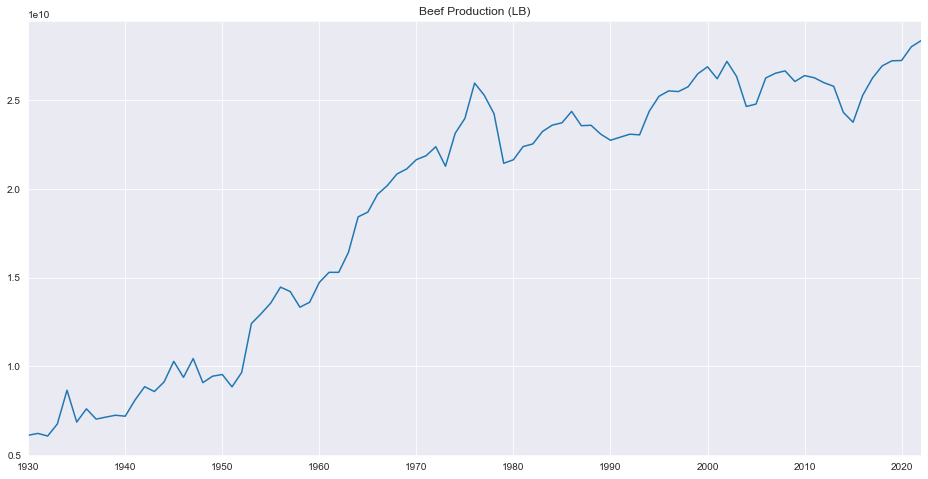

In [10]:
beef_production.plot()
plt.title("Beef Production (LB)")

In [11]:
us_population = get_us_population_historical_series()
us_population_annual = us_population.resample('Y').mean()

Text(0.5, 1.0, 'US Population')

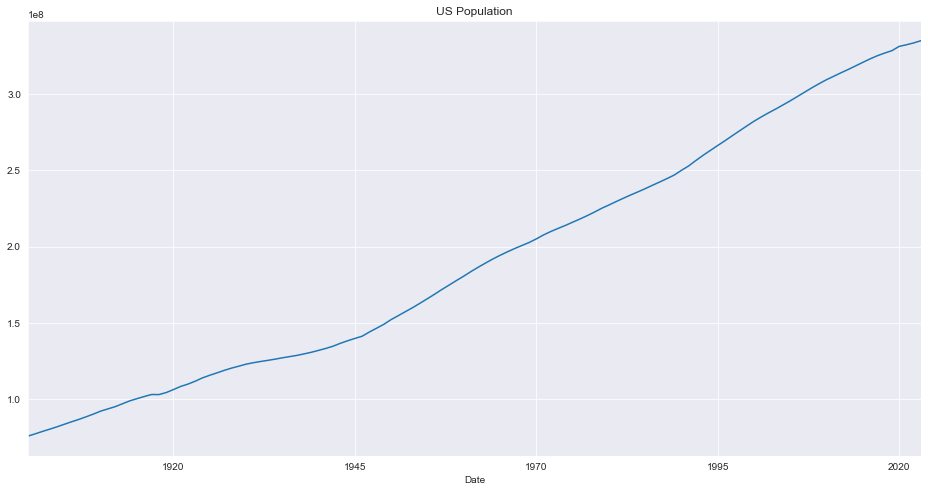

In [12]:
us_population_annual.plot()
plt.title('US Population')

Text(0.5, 1.0, 'Yearly Beef Production (LB) per Capita')

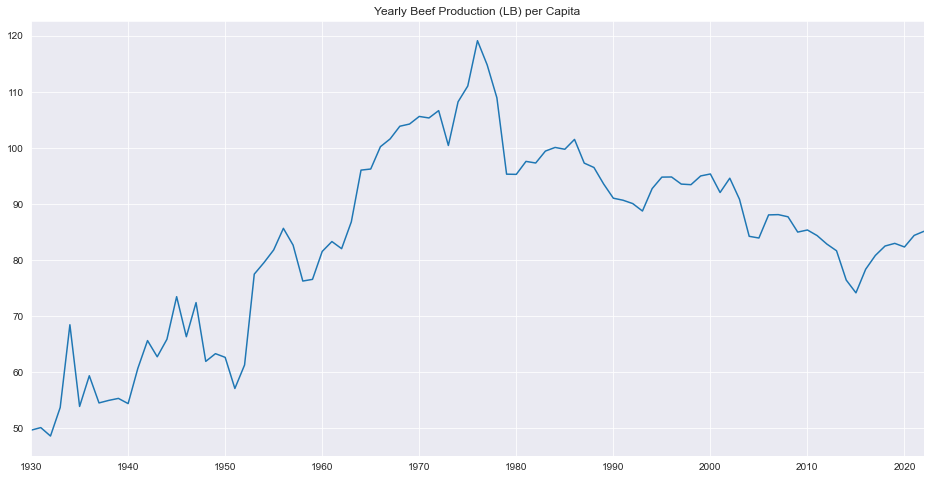

In [13]:
beef_production_per_capita_annual = (beef_production / us_population_annual).dropna()
beef_production_per_capita_annual.plot()

plt.title('Yearly Beef Production (LB) per Capita')

#### Corn cash price

<AxesSubplot:>

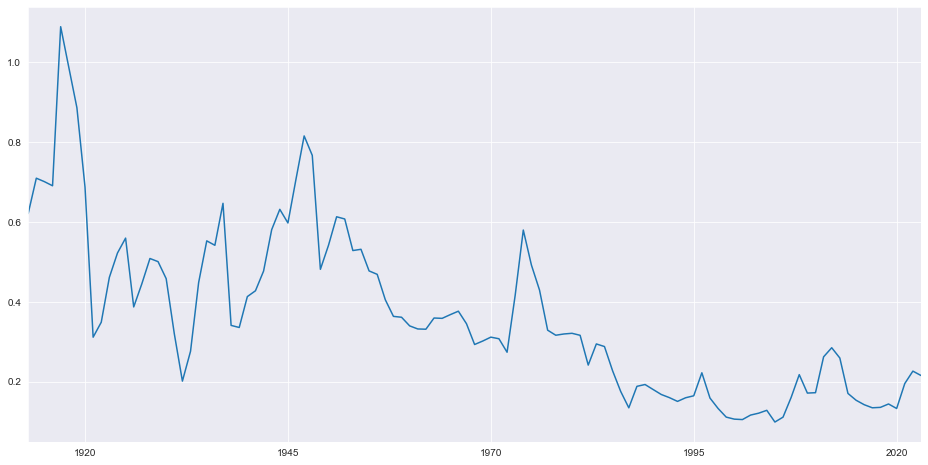

In [14]:
corn_price_received_per_bsh = pd.read_csv('csv/corn_price_received_per_bsh.csv')
corn_price_received_per_bsh = usda_clean_monthly(corn_price_received_per_bsh, historical=True)
corn_price_received_per_bsh_adj = src.adjust_series_cpi(corn_price_received_per_bsh)
corn_price_received_per_bsh_annual_adj = corn_price_received_per_bsh_adj.resample('Y').mean()

corn_price_received_per_bsh_annual_adj.plot()

In [15]:
corn_price_received_per_bsh_annual_adj

1913-12-31    0.621010
1914-12-31    0.709468
1915-12-31    0.700758
1916-12-31    0.690480
1917-12-31    1.088995
                ...   
2019-12-31    0.143855
2020-12-31    0.132541
2021-12-31    0.195025
2022-12-31    0.226145
2023-12-31    0.215203
Freq: A-DEC, Length: 111, dtype: float64

# Demand

#### Chicken slaughtered per capita

In [16]:
chicken_slaughtered_total_live_weight_annual = pd.read_csv('csv/chicken_slaughtered_total_live_weight_annual.csv')
chicken_slaughtered_total_live_weight_annual = usda_clean_annual(chicken_slaughtered_total_live_weight_annual, historical=True, end_of_year=True)

In [17]:
chicken_slaughtered_total_live_weight_annual

1960-12-31    5.672014e+09
1961-12-31    6.502970e+09
1962-12-31    6.615338e+09
1963-12-31    6.977999e+09
1964-12-31    7.293618e+09
                  ...     
2018-12-31    5.735772e+10
2019-12-31    5.907066e+10
2020-12-31    5.995651e+10
2021-12-31    6.026672e+10
2022-12-31    6.198759e+10
Name: Value, Length: 63, dtype: float64

Text(0.5, 1.0, 'Chicken Slaughtered Total Live Weight LB (Annual)')

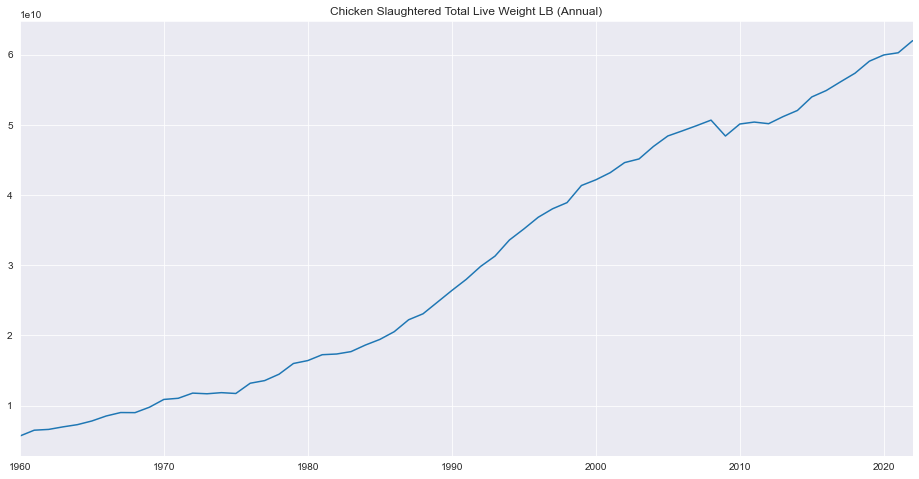

In [18]:
chicken_slaughtered_total_live_weight_annual.plot()
plt.title("Chicken Slaughtered Total Live Weight LB (Annual)")

Text(0.5, 1.0, 'Annual Chicken Slaughter Total Live Weight (LB) / capita')

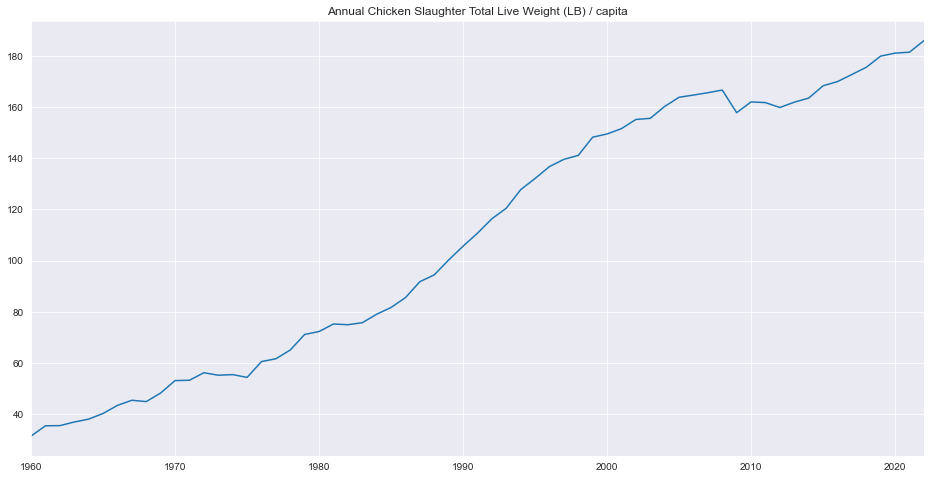

In [19]:
chicken_slaughtered_total_live_weight_annual_per_capita = (chicken_slaughtered_total_live_weight_annual / us_population_annual).dropna()
chicken_slaughtered_total_live_weight_annual_per_capita.plot()

plt.title('Annual Chicken Slaughter Total Live Weight (LB) / capita')

- Since 1960s chicken production per capita is increasing is steadily

#### Pork production per capita

In [ ]:
production_hogs_annual = pd.read_csv('csv/production_hogs_annual.csv')

production_hogs_annual.head()

Program  Year Period  Week Ending Geo Level     State  State ANSI  \
0  SURVEY  2022   YEAR          NaN  NATIONAL  US TOTAL         NaN   
1  SURVEY  2021   YEAR          NaN  NATIONAL  US TOTAL         NaN   
2  SURVEY  2020   YEAR          NaN  NATIONAL  US TOTAL         NaN   
3  SURVEY  2019   YEAR          NaN  NATIONAL  US TOTAL         NaN   
4  SURVEY  2018   YEAR          NaN  NATIONAL  US TOTAL         NaN   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   
3          NaN               NaN     NaN  ...       NaN     NaN   
4          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity                          Data Item  \
0               0        NaN       HOGS  HOGS - PRODUCTION, MEASURED IN LB   
1               0        NaN       HOGS  HOGS - PRODUCTION, MEASURED IN LB   
2               0        NaN       HOGS  HOGS - PRODUCTION, MEASURED IN LB   
3               0        NaN       HOGS  HOGS - PRODUCTION, MEASURED IN LB   
4               0        NaN       HOGS  HOGS - PRODUCTION, MEASURED IN LB   

  Domain Domain Category           Value CV (%)  
0  TOTAL   NOT SPECIFIED  40,595,785,000    NaN  
1  TOTAL   NOT SPECIFIED  40,091,129,000    NaN  
2  TOTAL   NOT SPECIFIED  40,500,333,000    NaN  
3  TOTAL   NOT SPECIFIED  42,196,603,000    NaN  
4  TOTAL   NOT SPECIFIED  38,498,011,000    NaN  

[5 rows x 21 columns]

In [ ]:
production_hogs_annual = usda_clean_annual(production_hogs_annual, historical=True, end_of_year=True)

Text(0.5, 1.0, 'Hog Production (LB)')

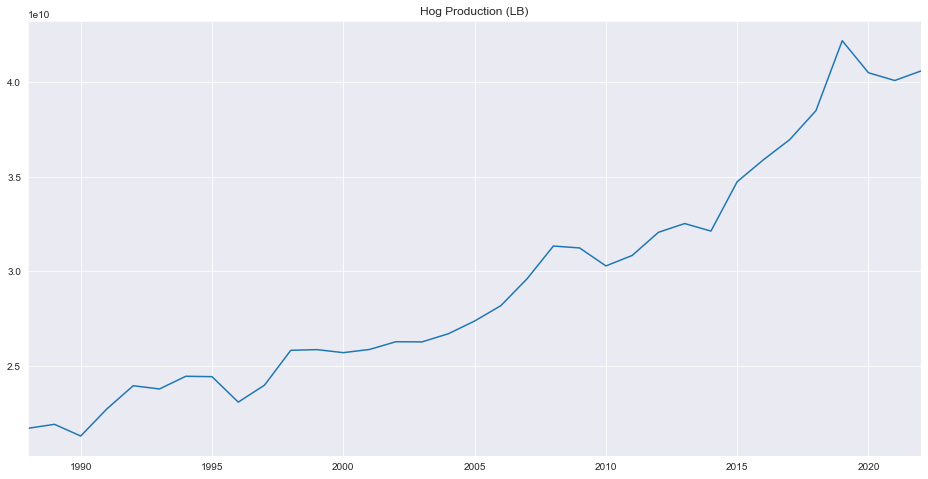

In [59]:
production_hogs_annual.plot()
plt.title("Hog Production (LB)")

Text(0.5, 1.0, 'Annual Hog Production (LB) / capita')

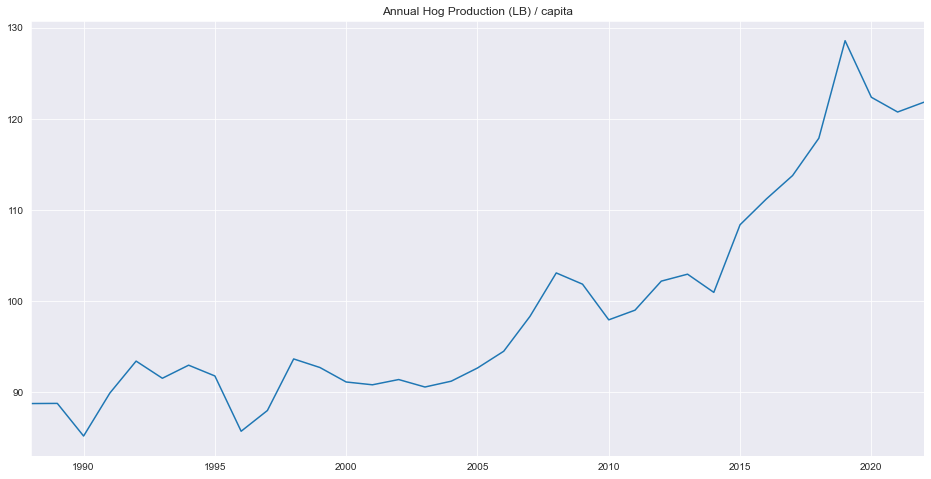

In [60]:
production_hogs_annual_annual_per_capita = (production_hogs_annual / us_population_annual).dropna()
production_hogs_annual_annual_per_capita.plot()

plt.title('Annual Hog Production (LB) / capita')

- Both pork and chicken have increasing supply / capita in US

#### Consumer Confidence Index

In [61]:
# http://www.sca.isr.umich.edu/tables.html
cci = pd.read_csv('csv/michigan_univ_consumer_confidence.csv')
cci.index = pd.to_datetime(cci['TIME'], format= '%Y-%m')
cci = cci.Value
cci_annual = cci.resample('Y').mean()

Text(0.5, 1.0, 'Michican University Consumer Confidence Index')

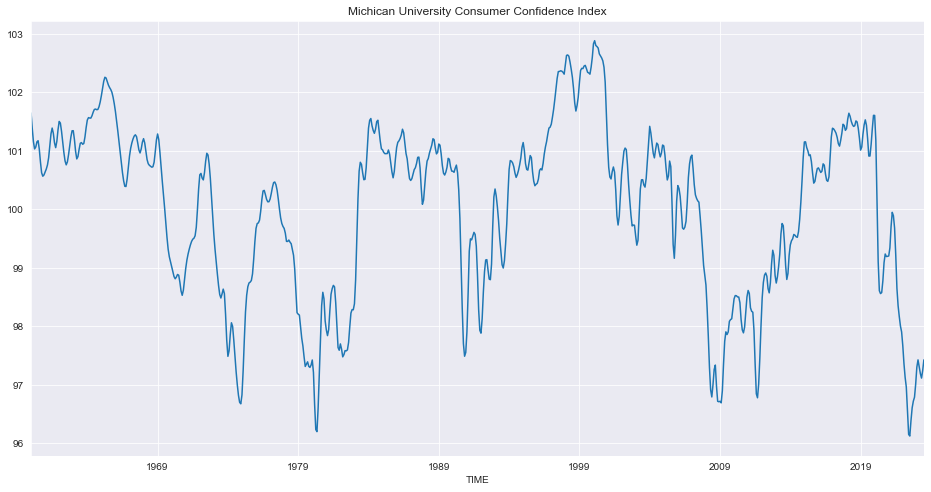

In [62]:
cci.plot()

plt.title('Michican University Consumer Confidence Index')

#### Beef Exports

In [63]:
beef_export = pd.read_csv('csv/export_beef_veal_fr_ch_fz_monthly2.csv')
beef_export = clean_fas_data(beef_export)

In [64]:
beef_export

Date
1967-01-01      739.7
1967-02-01      713.4
1967-03-01      901.2
1967-04-01      527.6
1967-05-01      795.4
               ...   
2023-02-01    80260.0
2023-03-01    91799.5
2023-04-01    86003.0
2023-05-01    85645.3
2023-06-01    86047.4
Name: Value, Length: 678, dtype: float64

<AxesSubplot:xlabel='Date'>

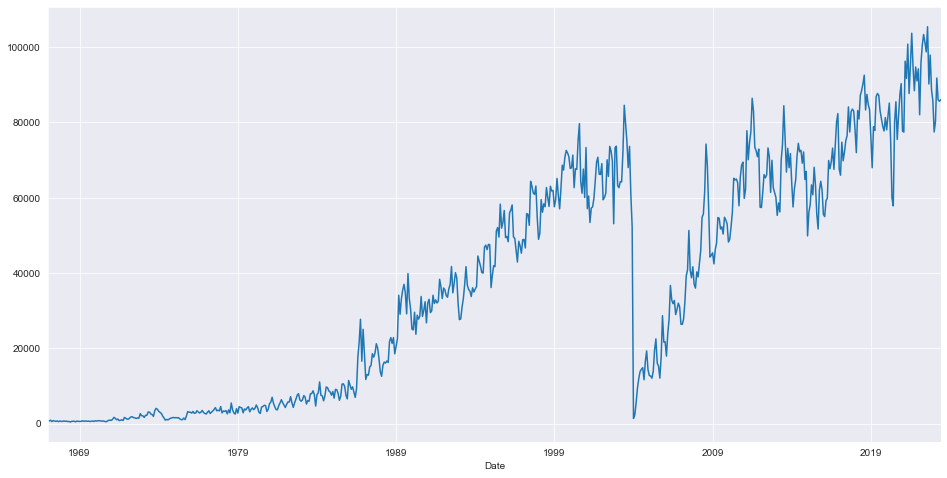

In [65]:
beef_export.plot()

In [66]:
print(beef_export.pct_change().idxmin())
print(beef_export.pct_change().min())


2004-01-01 00:00:00
-0.9736654899546016


- Largest drop in exports was in Jan 2004 -97%
- 'On December 23, 2003, the U.S. Department of Agriculture (USDA) announced a presumptive diagnosis of the first known case of BSE in the United States.'

<AxesSubplot:xlabel='Date'>

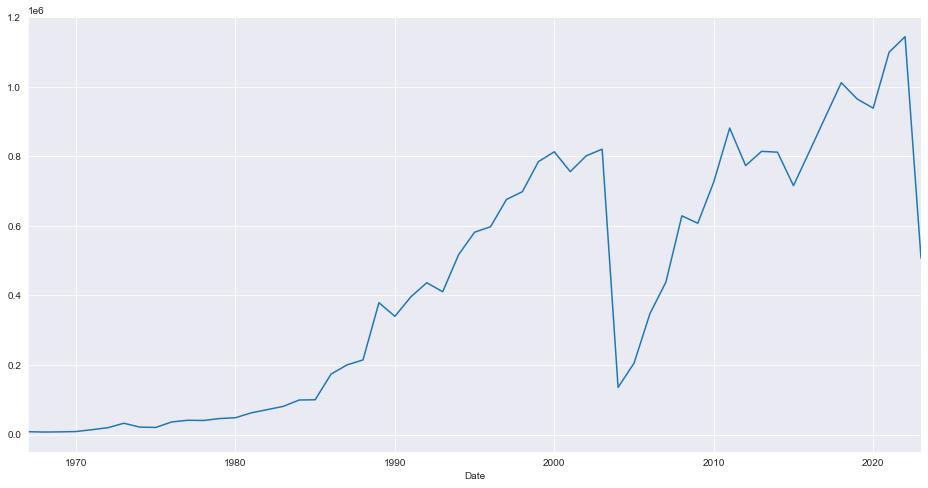

In [68]:
# change to annual
beef_export_annual = beef_export.resample('A').sum()
beef_export_annual.plot()

#### SP500

In [69]:
sp500 = src.get_sp500_historical_series()
sp500_annual_adj = src.adjust_series_cpi(sp500.resample('Y').mean())

<AxesSubplot:>

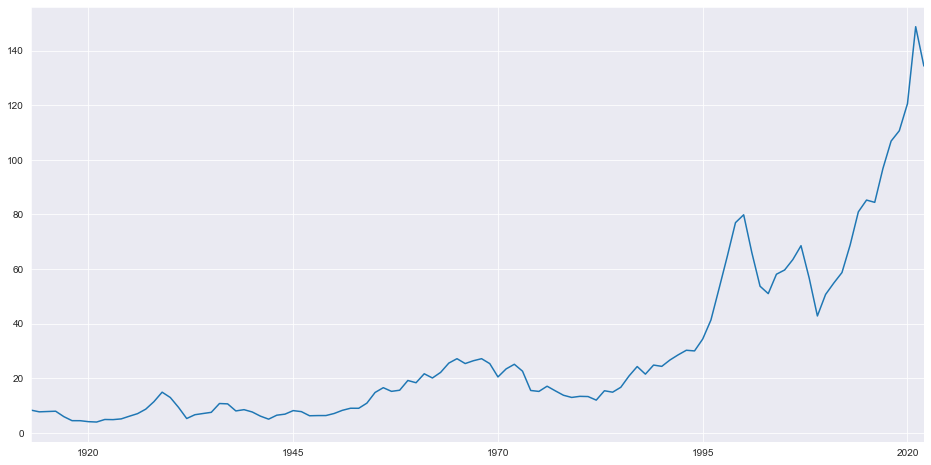

In [70]:
sp500_annual_adj.plot()

# Cattle Cash Price (>=500 LB)

In [71]:
price_received_ge_500_national = pd.read_csv('csv/price_received_ge_500_national.csv')
price_received_ge_500_national = usda_clean_monthly(price_received_ge_500_national, historical=True)
price_received_ge_500_national_annual = price_received_ge_500_national.resample('Y').mean()

<AxesSubplot:xlabel='Date'>

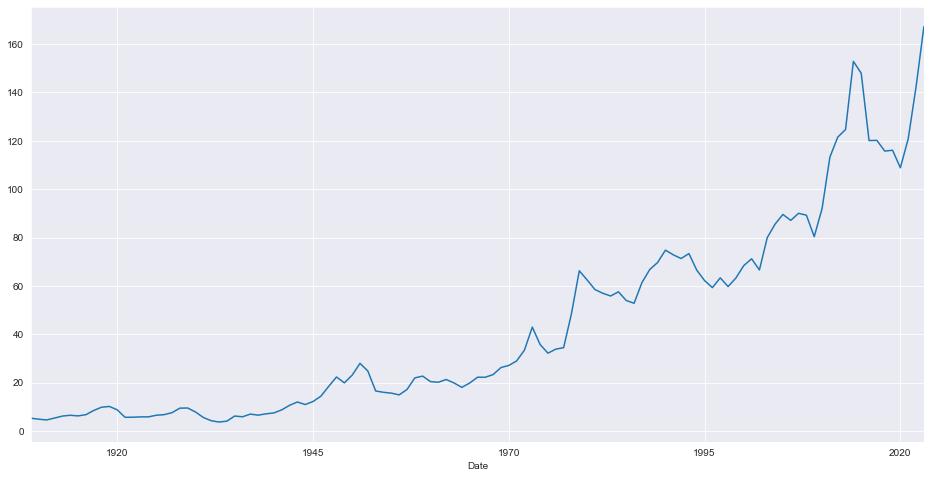

In [72]:
price_received_ge_500_national_annual.plot()

<AxesSubplot:>

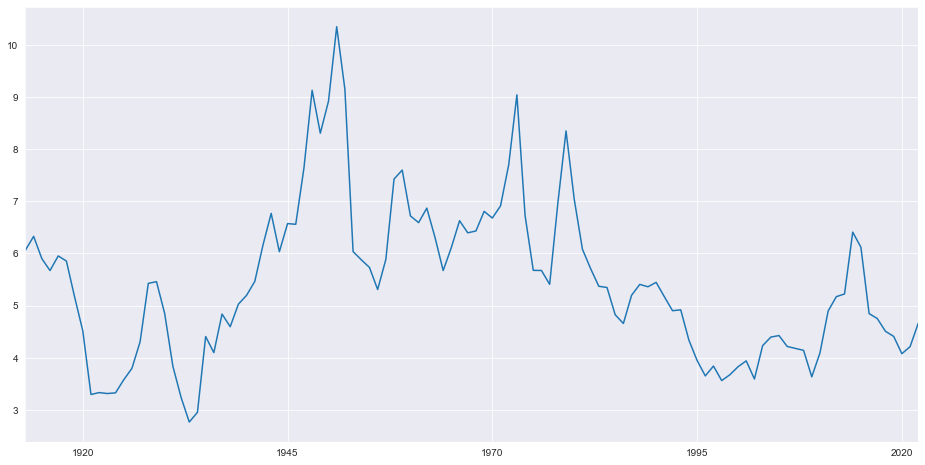

In [73]:
price_received_ge_500_national_annual_adj = adjust_series_cpi(price_received_ge_500_national_annual)
price_received_ge_500_national_annual_adj.plot()

- Adjusting for inflation, cash price of cattle has not changed too much (context of 100+ yr history)

Mean: 4.03%
Std: 14.03%


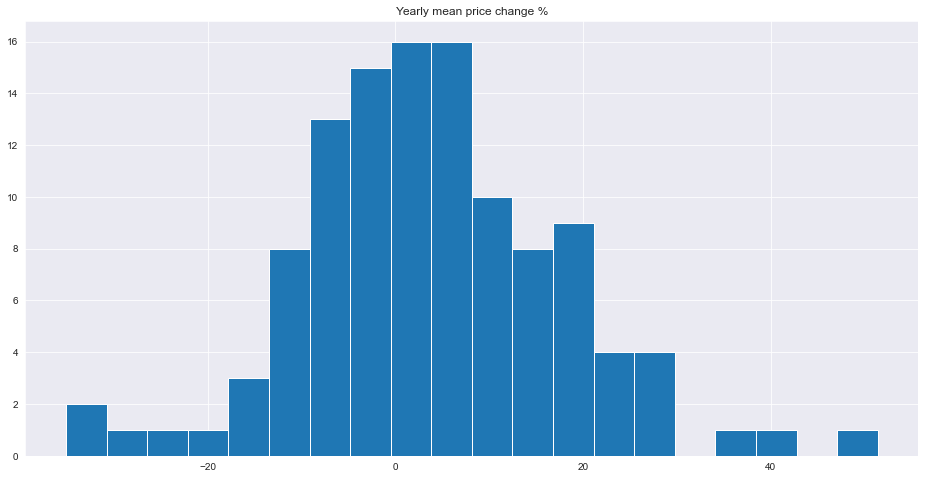

In [75]:
(price_received_ge_500_national_annual.pct_change()*100).hist(bins=20)

plt.title('Yearly mean price change %')

print(f"Mean: {price_received_ge_500_national_annual.pct_change().mean()*100:.2f}%")
print(f"Std: {price_received_ge_500_national_annual.pct_change().std()*100:.2f}%")

Mean: 0.50%
Std: 12.31%


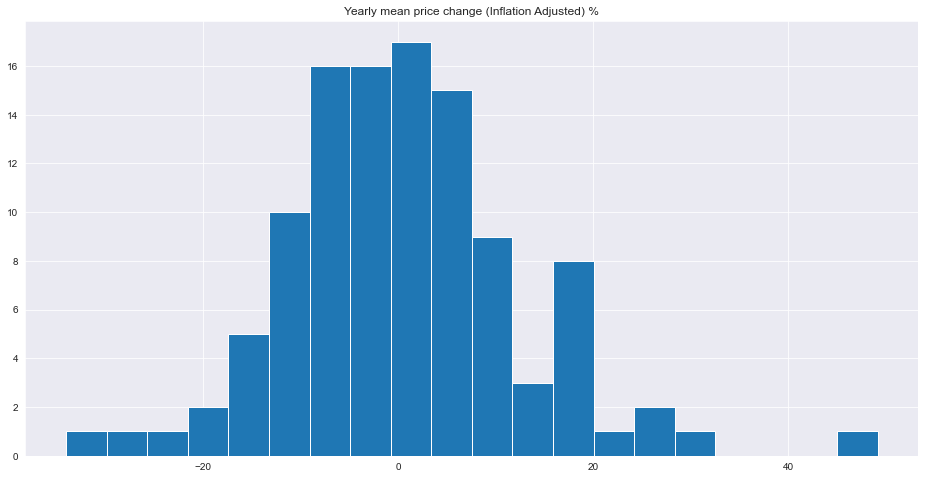

In [76]:
(adjust_series_cpi(price_received_ge_500_national_annual).pct_change()*100).hist(bins=20)

plt.title('Yearly mean price change (Inflation Adjusted) %')

print(f"Mean: {adjust_series_cpi(price_received_ge_500_national_annual).pct_change().mean()*100:.2f}%")
print(f"Std: {adjust_series_cpi(price_received_ge_500_national_annual).pct_change().std()*100:.2f}%")

# Model Baseline

- Baseline all following models to a simple AR(1) model, where we predict next year's cash price to to this years cash price - i.e. always predict the % change in price is 0 between years

In [77]:
ar1_mae = abs(price_received_ge_500_national_annual_adj.pct_change()*100).dropna().mean()

print(f'Mean absolute error of AR(1) model: {round(ar1_mae,2)} %')

Mean absolute error of AR(1) model: 9.14 %


# Multivariate Linear Regression

In [78]:
data = pd.concat(
    [
        price_received_ge_500_national_annual_adj,     # Dependent variable
        beef_production_per_capita_annual,      # Independent variable - Supply Factors
        corn_price_received_per_bsh_annual_adj,
        chicken_slaughtered_total_live_weight_annual_per_capita, # Independent variable - Demand Factors
        production_hogs_annual_annual_per_capita,
        cci_annual,
        beef_export_annual,
        sp500_annual_adj
        
    ], axis=1
)

In [79]:
data.columns = [
    "price_received_ge_500_national_annual_adj",
    "beef_production_per_capita_annual",
    "corn_price_received_per_bsh_annual_adj",
    "chicken_slaughtered_total_live_weight_annual_per_capita",
    "production_hogs_annual_annual_per_capita",
    "cci_annual",
    "beef_export_annual",
    "sp500_annual_adj"
]

In [85]:
# First valid index for each column

first_valid_index = data.apply(lambda x: x.first_valid_index())

print(first_valid_index)

price_received_ge_500_national_annual_adj                 1913-12-31
beef_production_per_capita_annual                         1930-12-31
corn_price_received_per_bsh_annual_adj                    1913-12-31
chicken_slaughtered_total_live_weight_annual_per_capita   1960-12-31
production_hogs_annual_annual_per_capita                  1988-12-31
cci_annual                                                1960-12-31
beef_export_annual                                        1967-12-31
sp500_annual_adj                                          1913-12-31
dtype: datetime64[ns]


In [86]:
data = data.dropna()

In [88]:
len(data)

35

In [89]:
data_pct_change = (data.pct_change()*100).dropna()

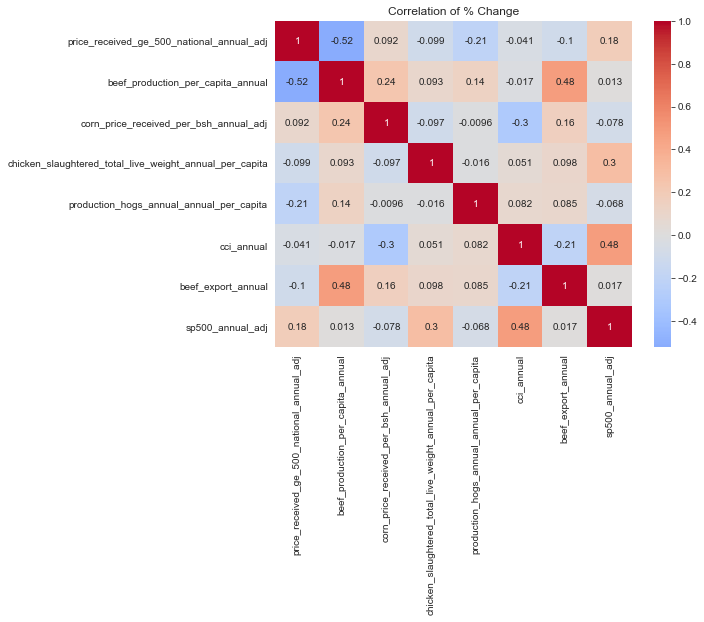

In [91]:
correlation_matrix = data_pct_change.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of % Change')
plt.show()


In [92]:
import statsmodels.api as sm

y = data_pct_change.iloc[:, 0]
X = data_pct_change.iloc[:, 1:]

model = sm.OLS(y, X).fit()

print(model.summary())

                                            OLS Regression Results                                            
Dep. Variable:     price_received_ge_500_national_annual_adj   R-squared (uncentered):                   0.405
Model:                                                   OLS   Adj. R-squared (uncentered):              0.250
Method:                                        Least Squares   F-statistic:                              2.620
Date:                                       Fri, 01 Sep 2023   Prob (F-statistic):                      0.0335
Time:                                               18:48:36   Log-Likelihood:                         -114.37
No. Observations:                                         34   AIC:                                      242.7
Df Residuals:                                             27   BIC:                                      253.4
Df Model:                                                  7                                                  
C

- Beef production per capita annual is the only dependent variable with statistically significant coefficient
- Negative coefficients of chicken and hog supply are expected
    - More chicken & hog supply -> lower price for these --> cheaper substitutes for beef --> lower demand for beef --> lower beef price
- SP500 has positive coefficient

In [149]:


def plot_fitted_actual(actual, fitted):
        
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots

    # create a subplot with two traces
    fig = make_subplots(rows=1, cols=1)

    fig.add_trace(go.Scatter(x=fitted.index, y=actual[fitted.index], mode='markers', name='Actual', marker=dict(color='blue')),
                row=1, col=1)

    fig.add_trace(go.Scatter(x=fitted.index, y=fitted, mode='markers', name='Fitted', marker=dict(color='red')),
                row=1, col=1)

    # add lines connecting predicted to actual values
    for i in range(len(fitted)):
        fig.add_shape(type='line',
                    x0=fitted.index[i], y0=fitted[i],
                    x1=fitted.index[i], y1=y[fitted.index[i]],
                    line=dict(color='red', width=1))

    # update layout
    fig.update_layout(title='Fitted vs. Actual Values',
                    xaxis_title='Date',
                    yaxis_title='Cattle cash price % change')


    print('Mean Absolute Error:', round(np.mean(abs(actual[fitted.index] - fitted)), 2))
    # show plot
    fig.show()

In [150]:
plot_fitted_actual(y, model.predict(X))

Mean Absolute Error: 5.33


- years where fitted values are off:
    - 1996, 2010, 2022

- Repeat with a lag of one year for independent and dependent variables (since cattle life span is typically <2 years)

In [140]:
# create a lag of 1 for all independent variables
X_lagged = X.shift(1)
X_lagged = X_lagged.dropna()

# rename the columns of the lagged DataFrame
X_lagged = X_lagged.add_suffix('_lag1')

y_lagged = y.shift(1)
y_lagged.name = y.name + '_lag1'

# concatenate the original and lagged independent variables
X_concat_lagged = pd.concat([X, X_lagged, y_lagged], axis=1)
X_concat_lagged = X_concat_lagged.dropna()

# fit the model with the original and lagged independent variables
model_lag1 = sm.OLS(y[X_concat.index], X_concat_lagged).fit()

# print the model summary
print(model_lag1.summary())

                                            OLS Regression Results                                            
Dep. Variable:     price_received_ge_500_national_annual_adj   R-squared (uncentered):                   0.665
Model:                                                   OLS   Adj. R-squared (uncentered):              0.386
Method:                                        Least Squares   F-statistic:                              2.383
Date:                                       Fri, 01 Sep 2023   Prob (F-statistic):                      0.0408
Time:                                               19:26:55   Log-Likelihood:                         -101.99
No. Observations:                                         33   AIC:                                      234.0
Df Residuals:                                             18   BIC:                                      256.4
Df Model:                                                 15                                                  
C

- Note how beef production has a negative coefficient, yet it's lagged value has a positive coefficeint
    - means that all else equal, a +5 % production, followed next year with -5% production, is more bulish than -5 % on both years


In [151]:
plot_fitted_actual(y, model_lag1.predict(X_concat_lagged))

Mean Absolute Error: 4.47


In [156]:
# create lags of 1 and 2 for all independent variables
X_lagged1 = X.shift(1)
X_lagged2 = X.shift(2)
X_lagged1 = X_lagged1.dropna()
X_lagged2 = X_lagged2.dropna()

# rename the columns of the lagged DataFrames
X_lagged1 = X_lagged1.add_suffix('_lag1')
X_lagged2 = X_lagged2.add_suffix('_lag2')

y_lagged1 = y.shift(1)
y_lagged1.name = y.name + '_lag1'


y_lagged2 = y.shift(2)
y_lagged2.name = y.name + '_lag2'


# concatenate the original and lagged independent variables
X_concat_lagged2 = pd.concat([X, X_lagged1, X_lagged2, y_lagged1, y_lagged2], axis=1)
X_concat_lagged2 = X_concat_lagged2.dropna()

# fit the model with the original and lagged independent variables
model_lag2 = sm.OLS(y[X_concat_lagged2.index], X_concat_lagged2).fit()

# print the model summary
print(model_lag2.summary())

                                            OLS Regression Results                                            
Dep. Variable:     price_received_ge_500_national_annual_adj   R-squared (uncentered):                   0.908
Model:                                                   OLS   Adj. R-squared (uncentered):              0.672
Method:                                        Least Squares   F-statistic:                              3.844
Date:                                       Fri, 01 Sep 2023   Prob (F-statistic):                      0.0206
Time:                                               19:34:36   Log-Likelihood:                         -78.775
No. Observations:                                         32   AIC:                                      203.5
Df Residuals:                                              9   BIC:                                      237.3
Df Model:                                                 23                                                  
C

In [157]:
plot_fitted_actual(y, model_lag2.predict(X_concat_lagged2))

Mean Absolute Error: 2.18
